# Final Proyect - Data Analysis IBM Course

## Student data:
### Name: Laura Farrer Muñoz
### Mail: laurafmdeveloper@gmail.com


# import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Tarea 1

In [2]:
# 1) Lee el fichero csv
url= 'https://raw.githubusercontent.com/laurafmdeveloper/ibm_proyecto_analisis_datos/1e5a8a91615d150f4f0c45645da13af2330d548c/data/Airbnb_Open_Data.csv'
df = pd.read_csv(url)


# 2 * - Para que muestre todas las columnas, ajustamos el maximo de columnas a 'ninguno' para que muestre todas las que tenga
# Esto es útil para comprender la tabla
pd.options.display.max_columns = None

# 2) Muestra las primeras 5 filas.
df.head()

C:\Users\LAURA\AppData\Local\Temp\ipykernel_20444\3627661292.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
# 3) Muestra los tipos de datos
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

# Tarea 2a: Limpieza de datos (cualquier herramienta)


## * 0. Análisis previo de las columnas y sus niveles:
Con un for revisamos los valores que existen en cada columna y si tiene menos de 10 niveles (valores) que los imprima para ver si hay: repeticiones, columnas con un único nivel (no aporta info), etc.


In [4]:
print("Nº de valores distintos que tiene cada columna")
print("*Si la lista de valores es menor a 10, también se imprimirá cada uno \n para analizarlo e identificar valores nulos, posibles repeticiones, etc\n")

for col in df:
  print('COLUMNA: ', df[col].name , '\nNº Niveles: ' , len(df[col].unique()))

  if ( len(df[col].unique()) <10):
    print( 'Nombre niveles: ', df[col].unique())

  print("\n\n")


Nº de valores distintos que tiene cada columna
*Si la lista de valores es menor a 10, también se imprimirá cada uno 
 para analizarlo e identificar valores nulos, posibles repeticiones, etc

COLUMNA:  id 
Nº Niveles:  102058



COLUMNA:  NAME 
Nº Niveles:  61282



COLUMNA:  host id 
Nº Niveles:  102057



COLUMNA:  host_identity_verified 
Nº Niveles:  3
Nombre niveles:  ['unconfirmed' 'verified' nan]



COLUMNA:  host name 
Nº Niveles:  13191



COLUMNA:  neighbourhood group 
Nº Niveles:  8
Nombre niveles:  ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']



COLUMNA:  neighbourhood 
Nº Niveles:  225



COLUMNA:  lat 
Nº Niveles:  21992



COLUMNA:  long 
Nº Niveles:  17775



COLUMNA:  country 
Nº Niveles:  2
Nombre niveles:  ['United States' nan]



COLUMNA:  country code 
Nº Niveles:  2
Nombre niveles:  ['US' nan]



COLUMNA:  instant_bookable 
Nº Niveles:  3
Nombre niveles:  [False True nan]



COLUMNA:  cancellation_policy 
Nº Niveles:  4
Nombre 

Del resultado:
COLUMNA:  neighbourhood group
 Nº Niveles:  8
Nombre niveles:  ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']

Vemos que hay grupos repetidos (palabras mal escritas): 'Brooklyn' y 'brookln' es el mismo y 'Manhattan'y 'manhatan' también.
Vamos a solventar este error y así tendremos sólo 2 grupos de barrio ('Manhattan' y 'Brooklyn')

In [5]:
# Regularizamos estos datos de 'neighbourhood group' a 'brooklyn' y 'manhattan'
print("En df['neighbourhood group'] regularizamos los datos de grupos repetidos a 'Brooklyn' y 'Manhattan'")
print(df['neighbourhood group'].unique())

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'Brooklyn', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'Manhattan', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'

print("Datos corregidos:")
print(df['neighbourhood group'].unique())

En df['neighbourhood group'] regularizamos los datos de grupos repetidos a 'Brooklyn' y 'Manhattan'
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
Datos corregidos:
['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']


## 1. Elimina las columnas no deseadas del dataframe, entre ellas se incluyen host id , id , country y country code.


In [6]:
df.shape[1] # (102599, 26) Hay 26 columnas antes de eliminar las que no necesitamos

26

In [7]:
# Eliminamos las columnas no deseadas buscándolas por su etiqueta (en 'labels) e indicamos si son filas o columnas (al ser columnas, el 'axis' es 1)
# Cuidado: Si se ejecuta más de 1 vez, no encuentra la columna ya eliminada y da error

df = df.drop(labels = ['id', 'host id','country', 'country code' ], axis=1)

In [8]:
df.shape[1] # Comprobamos que se han borrado las 4 columnas, ahora hay 22

22

## 2. Indica la razón por la cual se han eliminado estas columnas para tu análisis de datos

Los códigos e ids ('id', 'host id', y 'country code') no los necesitamos en este análisis; serían de utilidad en otras tareas: para relacionar varias tablas de una base de datos SQL con unos JOIN, por ejemplo. La columna 'country' tiene sólo 1 nivel, es decir, todos los apartamentos son del mismo país ('United States'), y por tanto, no añade información. 

Por esto podemos eliminar estas 4 columnas.

## Otras columnas que no son necesarias:

In [9]:
# Podemos eliminar estas columnas ya que no necesitamos su información

df = df.drop(labels = ['lat', 'long', 'house_rules', 'license'], axis=1)

In [17]:
df.shape[1]  # Comprobamos que hemos borrado las 4 columnas, ahora hay 18

18

# Tarea 2b: Limpieza de datos (Python)


Compueba si hay valores nulos y muestra el recuento en orden ascendente. Si faltan valores,
imputa los valores como consideres.
Comprueba si hay valores duplicados y elimínalos.
Muestra el número total de registros antes y después de eliminar los duplicados.


### 1 - V.Nulos

In [18]:
# Con 'sum()' cuenta el nº de valores nulos de cada columna y 'sort_values(ascending=True)' los ordena de forma ascendente
df.isnull().sum().sort_values(ascending=True)

room type                             0
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
host name                           406
minimum nights                      409
availability 365                    448
reviews per month                 15879
last review                       15893
dtype: int64

### 2 - Imputación de valores que faltan

In [19]:
# Gestión de datos: Imputación de valores que faltan
# Imputamos los valores nulos con la media en el caso de variables numéricas y con la moda en el caso de las categóricas:
print("\nGestión de datos: Imputación de valores que faltan\n\n")
print("\nTipo de dato de cada columna (nos permite clasificarlas en numéricas o categóricas) y recuento de valores no nulos\n")
print(df.info())


Gestión de datos: Imputación de valores que faltan



Tipo de dato de cada columna (nos permite clasificarlas en numéricas o categóricas) y recuento de valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   instant_bookable                102494 non-null  object 
 6   cancellation_policy             102523 non-null  object 
 7   room type                       102599 non-null  object 
 8   Construction year               102385 non-null  float64
 9   price                          

In [22]:
# Comprobamos el filtro en una columna:
print("Nº valores nulos en Col. neighbourhood: ",  df['neighbourhood'].isnull().sum())

filtro_nulos = df['neighbourhood'].isnull()
print("\n\n\n\n Aplicamos el filtro al dataframe para imprimir los todos los registros con valores nulos de la col. 'neighbourhood': \n\n\n", df[filtro_nulos])

Nº valores nulos en Col. neighbourhood:  16





 Aplicamos el filtro al dataframe para ver los Registros con valores nulos: 


                                                NAME host_identity_verified  \
517             "The Oasis" on Bedford Williamsburg            unconfirmed   
547                       STYLISH EAST VILLAGE FLAT               verified   
553            Comfortable. Spacious. Private Room.            unconfirmed   
575    2 Bed, 2 Bath Apartment on Central Park West            unconfirmed   
589                           CBG Helps Haiti Rm #3               verified   
613               Wonderfully inviting East Village               verified   
624           Stylish Studio with exclusive Terrace            unconfirmed   
633             Lower East Side/Chinatown 1 Bedroom               verified   
643                        2BR  Apt - 20min to Soho               verified   
670                Loft Suite @ The Box House Hotel               verified   
678          

In [24]:
# Imputamos los datos con la moda para var. categóricas y lamedia en numéricas
# Después se comprueba que todas las columnas han sido procesadas

categoricas = 0
numericas = 0


for col in df.columns:
  # Si el tipo de la columna es de tipo 'ó' mayuscula, es decir, object
  if (df[col].dtype == 'O'):
    print("Rellenando valores nulos de la columna categórica: ", col)
    print("mode: ",df[col].mode()[0])
    categoricas +=1
    print("nº col categoricas: ", str(categoricas))
    df[col] =df[col].fillna(df[col].mode()[0])


  else:

    print("Rellenando valores nulos de la columna numérica: ", col)

    print("mean: ",df[col].mean())

    numericas +=1
    print("nº col numericas: ", str(numericas))
    df[col].fillna(df[col].mean(), inplace=True)



# Se comprueba que todas las columnas han sido procesadas

print("Total col del dataframe:", len(df.columns))
print("Total col. numéricas + categóricas procesadas: ", numericas + categoricas)
print("Si devuelve True, todas las columnas de la tabla se han procesado correctamente: ", ( len(df.columns) == (numericas + categoricas) )  )

Rellenando valores nulos de la columna categórica:  NAME
mode:  Home away from home
nº col categoricas:  1
Rellenando valores nulos de la columna categórica:  host_identity_verified
mode:  unconfirmed
nº col categoricas:  2
Rellenando valores nulos de la columna categórica:  host name
mode:  Michael
nº col categoricas:  3
Rellenando valores nulos de la columna categórica:  neighbourhood group
mode:  Manhattan
nº col categoricas:  4
Rellenando valores nulos de la columna categórica:  neighbourhood
mode:  Bedford-Stuyvesant
nº col categoricas:  5
Rellenando valores nulos de la columna numérica:  instant_bookable
mean:  0.49727580190840065
nº col numericas:  1
Rellenando valores nulos de la columna categórica:  cancellation_policy
mode:  moderate
nº col categoricas:  6
Rellenando valores nulos de la columna categórica:  room type
mode:  Entire home/apt
nº col categoricas:  7
Rellenando valores nulos de la columna numérica:  Construction year
mean:  2012.487463983982
nº col numericas:  2
R

In [26]:
print("Si los nulos se han imputado correctamente, no habrá en ninguna columna\n", df.isnull().sum()) 

Si los nulos se han imputado correctamente, no habrá en ninguna columna
 NAME                              0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64


### 3 - Valores duplicados

In [27]:
## Comprueba si hay valores duplicados y elimínalos.
df.duplicated().sum()

3628

In [28]:
## Muestra el número total de registros antes de eliminar los duplicados.  // (102599, 18) registros: 102599
df.shape[0]

102599

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum() # Comprobamos que se eliminaron los duplicados

0

In [31]:
## Muestra el número total de registros después de eliminar los duplicados.  // (98984, 18) registros: 98984
df.shape[0]

98971

# Tarea 3: Transformación de datos


Cambia el nombre de la columna availability 365 a days_booked .

Convierte todos los nombres de columna a minúsculas y sustituye los espacios en los nombres de columna por un guión bajo "_".


Elimina el signo de dólares y la coma de las columnas price y service_fee . Si es necesario, convierte estas dos columnas al tipo de datos adecuado

In [32]:
df.rename(columns={'availability 365': 'days_booked'}, inplace=True)
print("Columna 'availability 365' se ha renombrado a 'days_booked'.")

Columna 'availability 365' se ha renombrado a 'days_booked'.


In [ ]:
print(df.columns)

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count', 'days_booked'],
      dtype='object')


In [34]:
# Todos los nombres de las columnas deben estar en minúscula y hay que remplazar los espacios por '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("Todos los nombres de las columnas deben estar en minúscula y hay que remplazar los espacios por '_':\n", df.columns)

Todos los nombres de las columnas deben estar en minúscula y hay que remplazar los espacios por '_':
 Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count', 'days_booked'],
      dtype='object')


In [35]:

#Elimina el signo de dólares y la coma de las columnas 'price' y 'service_fee' .
print(df["price"].head())

#Definimos la función 
def remove_dollar_sign(value):
  if pd.isna(value):
   return np.NaN
  else:

   return float(value.replace("$","").replace(",","").replace(" ",""))


0    $966 
1    $142 
2    $620 
3    $368 
4    $204 
Name: price, dtype: object


In [36]:
# Aplicamos la función a cada elemento de las columnas price y service_fee para
# eliminar la coma y el símbolo de dolar y después, transformar el tipo de dato a float
df["price"] = df["price"].apply(lambda x: remove_dollar_sign(x))
df['service_fee'] = df['service_fee'].apply(lambda x: remove_dollar_sign(x))

In [37]:
# COMPROBAMOS el resultado

print(df["price"].head())
print(df['service_fee'].head())


0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64
0    193.0
1     28.0
2    124.0
3     74.0
4     41.0
Name: service_fee, dtype: float64


# Tarea 4: Análisis exploratorio de datos

### Enumera los tipos de habitaciones disponibles en el dataset.

In [ ]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [38]:
df["room_type"].value_counts()

room_type
Entire home/apt    51916
Private room       44797
Shared room         2143
Hotel room           115
Name: count, dtype: int64

### ¿Qué tipo de habitación tiene la política de cancelación más estricta?


In [ ]:
# Vemos todos los valores que tiene la política de canc.
df["cancellation_policy"].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [41]:
# Filtro con la condición de que tienen política estricta 
# df["room_type"][df["cancellation_policy"] == 'strict' ]

# Filtramos las habitaciones que cumplen con una política estricta e imprimimos cuántas hay
df["room_type"][df["cancellation_policy"] == 'strict'].value_counts()




room_type
Entire home/apt    17214
Private room       14905
Shared room          717
Hotel room            34
Name: count, dtype: int64

In [42]:
# Otra forma de filtrar las habitaciones que cumplen con una política estricta e imprimimos cuántas hay
df["room_type"][ df["cancellation_policy"] == 'strict'].groupby(df["room_type"]).count()
 

room_type
Entire home/apt    17214
Hotel room            34
Private room       14905
Shared room          717
Name: room_type, dtype: int64

In [43]:
# La habitación con política de cancelación más estricta es:

print("La habitación con política de cancelación más estricta es: ", df["room_type"][ df["cancellation_policy"] == 'strict'].value_counts().idxmax())

La habitación con política de cancelación más estricta es  Entire home/apt


### Enumera el precio medio por barrio y señala cuál es el conjunto de barrios más caro para alquilar.

In [ ]:

df["price"].groupby(df["neighbourhood_group"]).mean().sort_values(ascending=False)

neighbourhood_group
Queens           628.546051
Staten Island    625.896175
Bronx            625.517440
brooklyn         625.446759
Manhattan        621.640501
Name: price, dtype: float64

Los conjuntos de barrios más caros son Queens y Staten Island

# Tarea 5a: Visualización de datos

### Enumerar los distintos tipos de habitaciones disponibles en Airbnb

### Las 3 primeras tareas son las mismas que la Tarea 4


### - Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de barras horizontales. ¿Cuál es el barrio más barato?

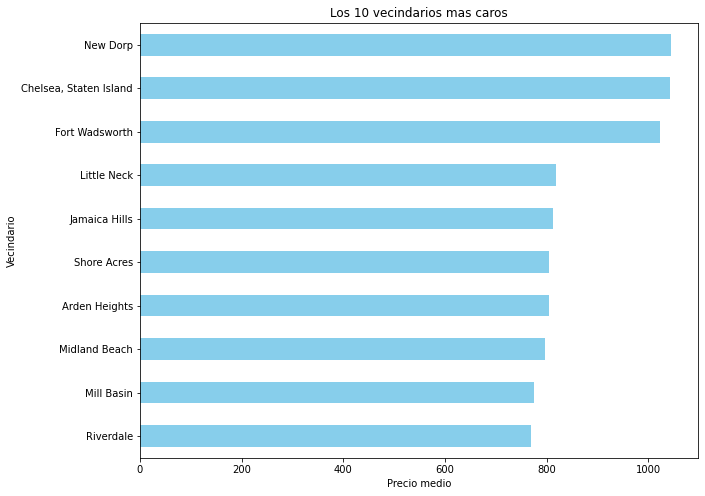

In [45]:
vecidarios_mas_caros = df.groupby('neighbourhood')['price'].mean().nlargest(10).sort_values()
plt.figure(figsize=(10, 8))
vecidarios_mas_caros.plot(kind='barh', color='skyblue')
plt.title('Los 10 vecindarios mas caros')
plt.xlabel('Precio medio')
plt.ylabel('Vecindario')
plt.show()

### Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días 

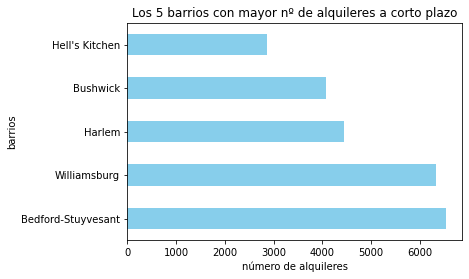

In [77]:
filtro_dias = df['minimum_nights']<10
df['neighbourhood'][filtro_dias].value_counts()

barrios_mas_alquileres_10_dias = df['neighbourhood'][filtro_dias].value_counts().nlargest(5)
barrios_mas_alquileres_10_dias.plot(kind='barh', color='skyblue')
plt.xlabel('número de alquileres')
plt.title('Los 5 barrios con mayor nº de alquileres a corto plazo')
plt.ylabel('barrios')
plt.show()

neighbourhood_group
Manhattan        621.640501
brooklyn         625.446759
Bronx            625.517440
Staten Island    625.896175
Queens           628.546051
Name: price, dtype: float64


<Axes: ylabel='neighbourhood_group'>

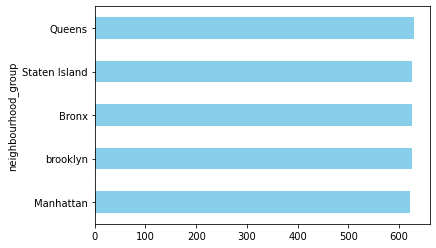

In [ ]:
# ojo en clase (ascending=False)

grouped_prices_ascend =df["price"].groupby(df["neighbourhood_group"]).mean().sort_values(ascending=True)
print(grouped_prices_ascend)
grouped_prices_ascend.plot(kind='barh', color='skyblue')

In [ ]:
list1 = [grouped_prices_ascend]
for i in list1:
  print(i.info)
# names_list= ['Manhattan','brooklyn','Bronx','Staten Island','Queens']

df2 = pd.DataFrame(list1).transpose()
#print(df2.columns.rename["mean_price", "neighbourhood_group" ])
#df2.rename(columns=["mean_price", "neighbourhood_group" ])
print(df2.columns[0])


#plt.bar(data =df2, x=df["neighbourhood_group"].unique(), height=df2)

<bound method Series.info of neighbourhood_group
Manhattan        621.640501
brooklyn         625.446759
Bronx            625.517440
Staten Island    625.896175
Queens           628.546051
Name: price, dtype: float64>
price


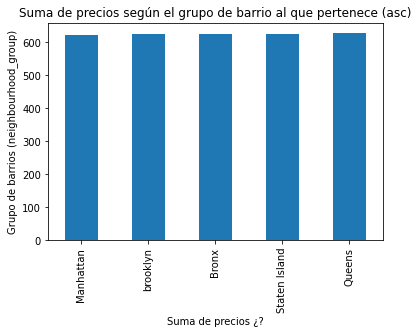

In [ ]:
#import matplotlib.pyplot as plt

#Plotear valores: grouped_prices_ascend
grouped_prices_ascend.plot(kind = 'bar')
# plt.bar(df["neighbourhood_group"], grouped_prices_ascend)


# Personalizar gráfico:
plt.xlabel("Suma de precios ¿?")
plt.ylabel("Grupo de barrios (neighbourhood_group)")
plt.title("Suma de precios según el grupo de barrio al que pertenece (asc)")

#Mostrar gráfico hola
plt.show()



<Axes: xlabel='neighbourhood_group'>

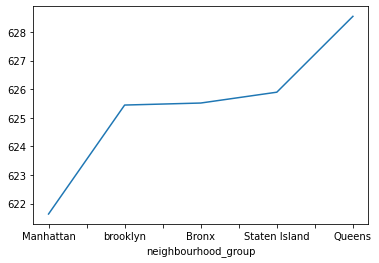

In [ ]:
grouped_prices_ascend.plot()

In [ ]:
# ojo en clase (ascending=False)

grouped_prices_ascend =df["price"].groupby(df["neighbourhood_group"]).sum().sort_values(ascending=True)
print(grouped_prices_ascend)


neighbourhood_group
Staten Island      572695.0
Bronx             1631975.0
Queens            8046018.0
brooklyn         25221766.0
Manhattan        26307826.0
Name: price, dtype: float64


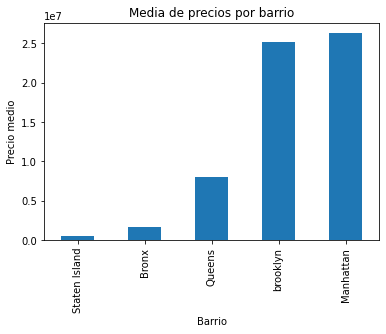

In [ ]:
import matplotlib.pyplot as plt

# Calcular la media de los precios por barrio medias_por_barrio = df.groupby('barrio')['precio'].mean()
m = df.groupby("neighbourhood_group")['price'].sum().sort_values(ascending=True)
# Crear el diagrama de barras
m.plot(kind='bar')
plt.title('Media de precios por barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio medio')
plt.show()


In [ ]:
# ojo en clase (ascending=False)

grouped_prices_ascend =df["price"].groupby(df["neighbourhood_group"]).mean().sort_values(ascending=True)
print(grouped_prices_ascend)


neighbourhood_group
Manhattan        621.640501
brooklyn         625.446759
Bronx            625.517440
Staten Island    625.896175
Queens           628.546051
Name: price, dtype: float64


<Axes: ylabel='price'>

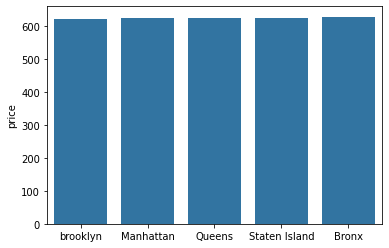

In [ ]:
sns.barplot(x= df["neighbourhood_group"].unique(), y = grouped_prices_ascend)

neighbourhood_group
Queens           628.546051
Staten Island    625.896175
Bronx            625.517440
brooklyn         625.446759
Manhattan        621.640501
Name: price, dtype: float64
precio media:  [628.5460510897586, 625.896174863388, 625.517439632043, 625.446758914844, 621.6405009451796]
barrios :  ['Queens', 'Staten Island', 'Bronx', 'brooklyn', 'Manhattan']
neighbourhood_group
Queens           628.546051
Staten Island    625.896175
Bronx            625.517440
brooklyn         625.446759
Manhattan        621.640501
Name: price, dtype: float64
628.5460510897586


(610.0, 650.0)

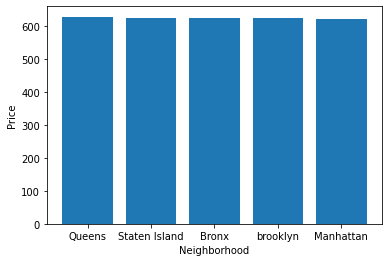

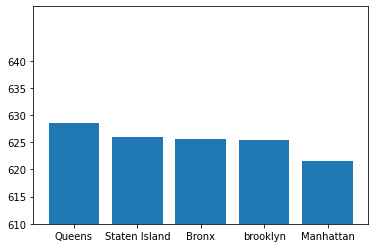

In [ ]:
grp2=df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending=False)
print(grp2)   
yy = [628.54, 625.89, 625.51, 625.44, 621.64]
y_precio_medio = grp2.values.tolist()
x_nombres_gr_barrios = grp2.index.tolist()
print("precio media: ", y_precio_medio)
 
print("barrios : ", x_nombres_gr_barrios)
#pd.DataFrame(df_list, columns=columns_names)
print(grp2.head())
fig, ax = plt.subplots()
ax.bar(x=x_nombres_gr_barrios, height=yy )
 
#plt.bar(
# grp2.head(10).plot(kind='barh',color={'green'})
plt.ylabel("Price")
plt.xlabel("Neighborhood")
new = []
for i in grp2.values:
    int(i)
    new.append(i)

print(new[0])
# Datos
x =  x_nombres_gr_barrios
y = yy

fig, ax = plt.subplots()
ax.bar(x = x, height = y)
plt.ylim(top=650)

plt.yticks([610, 615, 620, 625, 630, 635, 640])
plt.ylim(bottom=610)

In [ ]:
grouped_prices_dsc =df["price"].groupby(df["neighbourhood_group"]).mean().sort_values(ascending=False)
print(grouped_prices_dsc)

neighbourhood_group
Queens           628.546051
Staten Island    625.896175
Bronx            625.517440
brooklyn         625.446759
Manhattan        621.640501
Name: price, dtype: float64


In [ ]:


# Data preparation flights_grouped = flights[['year', 'passengers']].astype({'year': 'string'}).groupby('year').sum().reset_index()
​

# Creating a line plot  plt.plot(flights_grouped['year'], flights_grouped['passengers'])

#Plotear valores:
plt.bar(df["neighbourhood_group"], grouped_prices_dsc)
#plt.plot(df["neighbourhood_group"], grouped_prices_dsc)

#grouped_prices_dsc.plot(kind='')


# Personalizar gráfico:
plt.xlabel("Suma de precios ¿?")
plt.ylabel("Grupo de barrios (neighbourhood_group)")
plt.title("Suma de precios según el grupo de barrio al que pertenece (asc)")

#Mostrar gráfico hola
plt.show()

SyntaxError: invalid non-printable character U+200B (2987069184.py, line 2)

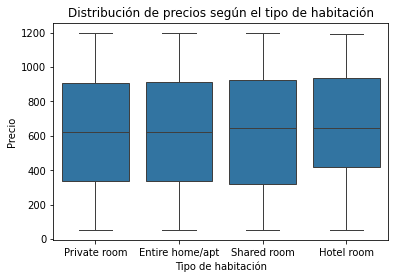

In [ ]:
# ------------------------------------------
#Crear gráfico de caja:
sns.boxplot(data = df, x = 'room_type', y ='price')


# Personalizar gráfico:
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio")
plt.title("Distribución de precios según el tipo de habitación")

#Mostrar gráfico
plt.show()

Qué tipo de habitación se adhiere a una política de cancelación más estricta.
Enumere los precios por grupo de barrios y mencione también cuál es el grupo de barrios más caro
para los alquileres.
Enumere los 10 barrios más caros por orden creciente de precio con la ayuda de un gráfico de
barras horizontales. ¿Cuál es el barrio más barato?
Enumere los barrios que ofrecen alquileres a corto plazo de menos de 10 días. Ilustrar con un
gráfico de barras
Enumere los precios con respecto al tipo de habitación utilizando un gráfico de barras y exponga
también sus inferencias.
Cree un gráfico circular que muestre la distribución de los días reservados para cada grupo de
barrios

# Tarea 5b: Visualización de datos

###¿El precio del servicio y el precio de la habitación tienen un impacto mutuo? Ilustre esta relación con un gráfico de dispersión e indique sus inferencias


###Utilizando un gráfico lineal muestre en qué año tuvo lugar la máxima construcción de habitaciones

#Tarea 5c: Visualización de datos

## Con la ayuda de gráficos de caja ilustra lo siguiente
###Efecto del número de tasa de revisión en el precio


In [ ]:
# insert code

###Efecto de la identidad del host verificada en el precio

# Tarea 5c: Visualización de datos